## Pluvio test

In [1]:
import os
import datetime
import glob

import pandas as pd
import plotly.graph_objects as go

In [2]:
path = r'data/eq_pluvio/prueba_cim/'                   # use your path
all_files = glob.glob(os.path.join(path, "*.CSV"))     # advisable to use os.path.join as this makes concatenation OS independent
all_files = sorted(all_files, reverse=False)

dfs = (pd.read_csv(f, sep=";", parse_dates=['datetime'], names=['datetime', 'voltaje', 'x', 'y','cangilones'], comment='#') for f in all_files)
eq = pd.concat(dfs, ignore_index=True)
eq.tail()

datetime  voltaje     x     y  cangilones
158518 2024-04-16 18:06:08       97  1320 -1320           0
158519 2024-04-16 18:07:05       96  1320 -1320           0
158520 2024-04-16 18:08:07       97  1320 -1320           0
158521 2024-04-16 18:09:05       97  1320 -1320           0
158522 2024-04-16 18:10:07       97  1320 -1320           0

**Creo dataframe solamente con la lluvia y lo guardo en un archivo**

In [3]:
lluvia = eq.loc[:,["datetime", "cangilones"]]
lluvia.datetime = pd.to_datetime(lluvia.datetime)
lluvia.to_csv("data/eq_pluvio/todo_junto.csv", index=False)

In [4]:
contenido = open("data/eq_pluvio/todo_junto.csv").readlines()
contenido = contenido[1:]
salida = open("data/eq_pluvio/eq_mm_diarios.csv", "a")

fecha_hora, cangi_acum = contenido[1].split(",")
fecha_ant, hora_ant = fecha_hora.split()

for i,renglon in enumerate(contenido[1:]):
    renglon = renglon.strip()
    fecha_hora, cangi_acum = renglon.split(",")
    fecha, hora = fecha_hora.split()
    if fecha != fecha_ant:
        fecha_ant = fecha
        fh_prev, cangi_prev = contenido[i-1].split(",")
        f_prev, h_prev = fh_prev.split()
        #print(f_prev, int(cangi_acum.rstrip())*0.25)
        renglon_salida = f_prev + ";" + str(int(cangi_acum.rstrip())*0.20) + "\n"
        salida.write(renglon_salida)
salida.close()

## Visualizo

In [5]:
lluvia_total= pd.read_csv("data/eq_pluvio/eq_mm_diarios.csv", sep=";", names=["fecha", "mm"])
lluvia_total.head()

fecha   mm
0  2023-12-26  0.0
1  2023-12-27  0.0
2  2023-12-28  1.8
3  2023-12-29  1.2
4  2023-12-30  0.0

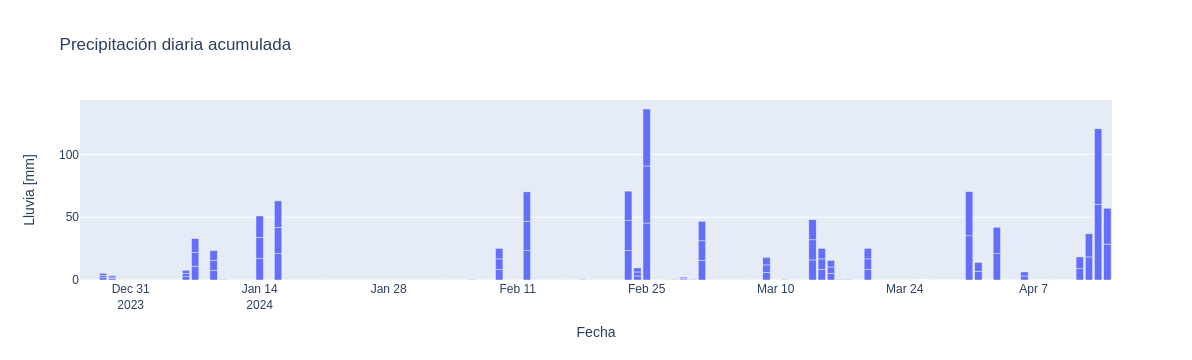

In [6]:
fig = go.Figure()
fig.add_trace(go.Bar(x=lluvia_total.fecha, y=lluvia_total.mm))
fig.update_layout(title="Precipitación diaria acumulada", xaxis_title="Fecha", yaxis_title="Lluvia [mm]")

In [8]:
9.2 + 18.4 + 60.2 + 28.6

116.4